In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [3]:
data = pd.read_csv('data/gym_data.csv')

In [4]:
data.head()

,S.No.,Title,Desc,Type,BodyPart,Equipment,Level
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate


In [5]:
def to_String(row):
    title = row['Title']
    type = row['Type']
    desc = row['Desc']
    bodypart = row['BodyPart']
    equipment = row['Equipment']
    level = row['Level']
    return "%s %s %s %s %s %s"%(title,desc,type,bodypart,equipment,level)

In [6]:
data['string'] = data.apply(to_String,axis=1)
data['string']

0       Partner plank band row The partner plank band ...
1       Banded crunch isometric hold The banded crunch...
2       FYR Banded Plank Jack The banded plank jack is...
3       Banded crunch The banded crunch is an exercise...
4       Crunch The crunch is a popular core exercise t...
                              ...                        
1363    Decline EZ-bar skullcrusher The decline EZ-bar...
1364    EZ-Bar Skullcrusher The EZ-bar skullcrusher is...
1365    EZ-bar skullcrusher- The EZ-bar skullcrusher i...
1366    EZ-Bar Skullcrusher - Gethin Variation The EZ-...
1367    TBS Skullcrusher The EZ-bar skullcrusher is a ...
Name: string, Length: 1368, dtype: object

In [7]:
tfidf =  TfidfVectorizer(max_features=2000)
tfidf

TfidfVectorizer(max_features=2000)

In [8]:
X = tfidf.fit_transform(data['string'])
X

<1368x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 61448 stored elements in Compressed Sparse Row format>

In [9]:
X.shape

(1368, 2000)

In [10]:
# Mapping to be generated
exercisetoidx = pd.Series(data.index,index= data['string'])
exercisetoidx

string
Partner plank band row The partner plank band row is an abdominal exercise where two partners perform single-arm planks while pulling on the opposite ends of an exercise band. This technique can be done for time or reps in any ab-focused workout. Strength Abdominals Bands Intermediate                                                                                                                                                                    0
Banded crunch isometric hold The banded crunch isometric hold is an exercise targeting the abdominal muscles, particularly the rectus abdominis or "six-pack" muscles. The band adds resistance and continuous tension to this popular exercise. Strength Abdominals Bands Intermediate                                                                                                                                                                          1
FYR Banded Plank Jack The banded plank jack is a variation on the plank that involves movin

In [11]:
idx = exercisetoidx['FYR Banded Plank Jack Strength Abdominals Bands Intermediate']
idx

KeyError: 'FYR Banded Plank Jack Strength Abdominals Bands Intermediate'

In [ ]:
# Accessing the vector corresponding to the exercise address
query = X[idx]
query

<1x531 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
query.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.2139443 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48678792, 0.36401445, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
# Comparing the query to every vector in X 
scores =  cosine_similarity(query,X,dense_output=True)
scores

array([[0.39440585, 0.41366295, 1.        , ..., 0.01634914, 0.01520627,
        0.02012108]])

In [ ]:
scores = scores.flatten()

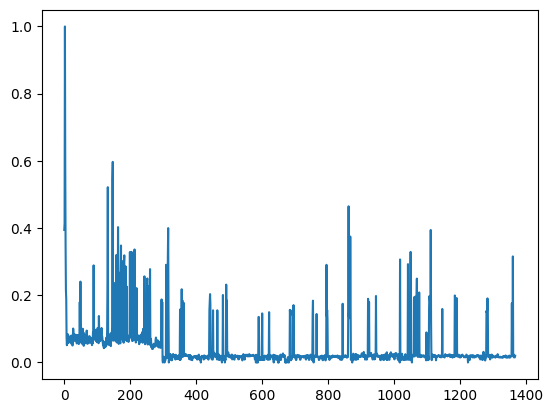

In [ ]:
plt.plot(scores);

In [ ]:
(-scores).argsort()

array([  2, 147,   3, ..., 670, 672, 317], dtype=int64)

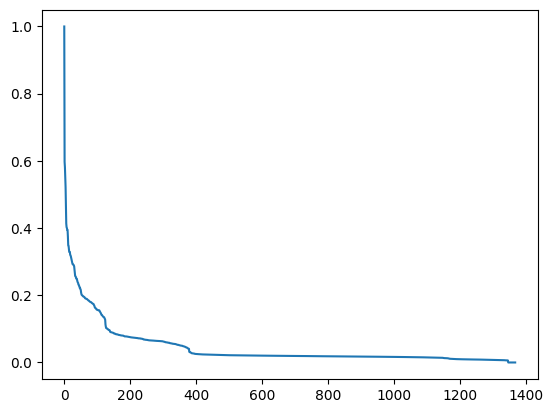

In [ ]:
plt.plot(scores[(-scores).argsort()]);

In [138]:
# Final Function
def recommend(text,tfidf,X,data):
    recommendations = []
    user_tfidf = tfidf.transform([text])
    scores = cosine_similarity(user_tfidf,X).flatten()
    recommend_idx = (-scores).argsort()[:10]
    for idx in recommend_idx:
        name = data['Title'].iloc[idx]
        desc = data['Desc'].iloc[idx]
        target_muscle = data['BodyPart'].iloc[idx]
        level = data['Level'].iloc[idx]
        type = data['Type'].iloc[idx]
        equipment = data['Equipment'].iloc[idx]
        recommendations.append({"name":name,"desc":desc,"target_muscle":target_muscle,"level":level,"type":type,"equipment":equipment})
    return recommendations

In [150]:
exercise = input("String of user : ")
recommend(exercise,tfidf,X,data)

[{'name': 'Partner plank band row',
  'desc': 'The partner plank band row is an abdominal exercise where two partners perform single-arm planks while pulling on the opposite ends of an exercise band. This technique can be done for time or reps in any ab-focused workout.',
  'target_muscle': 'Abdominals',
  'level': 'Intermediate',
  'type': 'Strength',
  'equipment': 'Bands'},
 {'name': 'Kettlebell power clean',
  'desc': 'The kettlebell power clean is an explosive kettlebell exercise where the lifter pulls the weight to shoulder level with a slight swing between the legs. It is often used as a drill to teach kettlebell clean technique, but is also a valuable power exercise in its own right. It can be performed in low rep ranges for strength or higher rep ranges for technique practice or muscle growth.',
  'target_muscle': 'Quadriceps',
  'level': 'Intermediate',
  'type': 'Strength',
  'equipment': 'Kettlebells'},
 {'name': 'Kettlebell thruster progression',
  'desc': 'The kettlebell 

In [140]:
# Preprocessing the input structure
with open('test.json','r') as file:
    input_dict = json.load(file)
input_dict

{'uid': 'YASH',
 'target_muscle': ['Abdominals', 'Chest', 'Lats'],
 'level': 'Beginner',
 'type': ['Strength', 'Cardio']}

In [141]:
input_list = [] # Contains all the list of input strings
output_list = [] # Contains all the recommendations
tm = list(input_dict.values())[1]
for i in range(len(tm)):
    input_string = tm[i] + " " + input_dict["level"] + " " +' '.join(list(input_dict.values())[3])
    output = recommend(input_string,tfidf,X,data)
    output_list.append(output)
    input_list.append(input_string)
    print(input_string)

Abdominals Beginner Strength Cardio
Chest Beginner Strength Cardio
Lats Beginner Strength Cardio


In [142]:
output_list
l = len(output_list)

In [143]:
#  Final Structuring of Output Format
keys = ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"]
output_dict = {"uid":input_dict["uid"]}
for i,key in enumerate(keys):
    output_dict[key] = output_list[i%l]
output_dict

{'uid': 'YASH',
 'monday': [{'name': 'High knees',
   'desc': 'High knees is a full-body, cardio-based exercise with an emphasis on the lower body. It is often performed for reps or time as part of a dynamic warm-up.',
   'target_muscle': 'Quadriceps',
   'level': 'Intermediate',
   'type': 'Cardio',
   'equipment': 'Body Only'},
  {'name': 'Stairmaster',
   'desc': 'The stair climber is a popular cardio machine found in most commercial gyms. Along with burning a ton of calories, the stair climber also helps build strength in the lower body, especially the glutes. It can work well at higher speeds for interval-style conditioning training, but also works well at slower paces for steady-state cardio.',
   'target_muscle': 'Quadriceps',
   'level': 'Intermediate',
   'type': 'Cardio',
   'equipment': 'Machine'},
  {'name': 'Stair climber',
   'desc': 'The stair climber is a popular cardio machine found in most commercial gyms. Along with burning a ton of calories, the stair climber also h

In [144]:
# Converting to json
with open('output.json','w') as json_file:
    json.dump(output_dict,json_file,indent=2)